# 準備

In [15]:
import base64
import json
from requests import Request, Session
from io import BytesIO
from PIL import Image
import pandas as pd
import jaconv
import re
import cv2
import numpy as np
from symspellpy.symspellpy import SymSpell, Verbosity
import pickle
from pykakasi import kakasi
import Levenshtein
from collections import OrderedDict
import itertools
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

In [5]:
import glob
url_list=glob.glob('/Users/obara/Downloads/prescription_data_jpeg/*')

In [6]:
url_list[:4]

['/Users/obara/Downloads/prescription_data_jpeg/photo-1201.jpeg',
 '/Users/obara/Downloads/prescription_data_jpeg/photo-238.jpeg',
 '/Users/obara/Downloads/prescription_data_jpeg/photo-392.jpeg',
 '/Users/obara/Downloads/prescription_data_jpeg/photo-668.jpeg']

In [77]:
result_list=[]
import traceback
photo_num=0
for url in url_list[0:40]:
    print(photo_num)
    photo_num=photo_num+1
    print(url)
    try:
        image_array=path_to_array(url)
    except:
        continue
    try: 
        num=url.split("photo-")[1].split(".jpeg")[0]
        result_list.append({num:yugami(image_array)})
    except:
        traceback.print_exc()
        continue
    print("----------")
dic={}
for result in result_list:
    dic.update(result)

0
/Users/obara/Downloads/prescription_data_jpeg/photo-1201.jpeg
1
/Users/obara/Downloads/prescription_data_jpeg/photo-238.jpeg
----------
2
/Users/obara/Downloads/prescription_data_jpeg/photo-392.jpeg
----------
3
/Users/obara/Downloads/prescription_data_jpeg/photo-668.jpeg
----------
4
/Users/obara/Downloads/prescription_data_jpeg/photo-687.jpeg


Traceback (most recent call last):
  File "<ipython-input-77-9afe46949ce1>", line 14, in <module>
    result_list.append({num:yugami(image_array)})
  File "<ipython-input-41-e62ca631abff>", line 8, in yugami
    waku_detection_result=waku_detection(image_array)
  File "<ipython-input-75-49a55cdb6323>", line 47, in waku_detection
    right_up= sorted(right,key=lambda x:x[0][1]) [1]
IndexError: list index out of range


5
/Users/obara/Downloads/prescription_data_jpeg/photo-404.jpeg
----------
6
/Users/obara/Downloads/prescription_data_jpeg/photo-957.jpeg
----------
7
/Users/obara/Downloads/prescription_data_jpeg/photo-812.jpeg
----------
8
/Users/obara/Downloads/prescription_data_jpeg/photo-541.jpeg


Traceback (most recent call last):
  File "<ipython-input-77-9afe46949ce1>", line 14, in <module>
    result_list.append({num:yugami(image_array)})
  File "<ipython-input-41-e62ca631abff>", line 8, in yugami
    waku_detection_result=waku_detection(image_array)
  File "<ipython-input-75-49a55cdb6323>", line 46, in waku_detection
    right_down= sorted(right,key=lambda x:x[0][1]) [0]
IndexError: list index out of range


9
/Users/obara/Downloads/prescription_data_jpeg/photo-1128.jpeg
----------
10
/Users/obara/Downloads/prescription_data_jpeg/photo-111.jpeg
----------
11
/Users/obara/Downloads/prescription_data_jpeg/photo-795.jpeg
----------
12
/Users/obara/Downloads/prescription_data_jpeg/photo-280.jpeg
----------
13
/Users/obara/Downloads/prescription_data_jpeg/photo-900.jpeg
----------
14
/Users/obara/Downloads/prescription_data_jpeg/photo-1190.jpeg
15
/Users/obara/Downloads/prescription_data_jpeg/photo-453.jpeg
----------
16
/Users/obara/Downloads/prescription_data_jpeg/photo-1485.jpeg
----------
17
/Users/obara/Downloads/prescription_data_jpeg/photo-146.jpeg
----------
18
/Users/obara/Downloads/prescription_data_jpeg/photo-516.jpeg
----------
19
/Users/obara/Downloads/prescription_data_jpeg/photo-845.jpeg


Traceback (most recent call last):
  File "<ipython-input-77-9afe46949ce1>", line 14, in <module>
    result_list.append({num:yugami(image_array)})
  File "<ipython-input-41-e62ca631abff>", line 8, in yugami
    waku_detection_result=waku_detection(image_array)
  File "<ipython-input-75-49a55cdb6323>", line 46, in waku_detection
    right_down= sorted(right,key=lambda x:x[0][1]) [0]
IndexError: list index out of range


20
/Users/obara/Downloads/prescription_data_jpeg/photo-783.jpeg
----------
21
/Users/obara/Downloads/prescription_data_jpeg/photo-279.jpeg
----------
22
/Users/obara/Downloads/prescription_data_jpeg/photo-629.jpeg
----------
23
/Users/obara/Downloads/prescription_data_jpeg/photo-296.jpeg
----------
24
/Users/obara/Downloads/prescription_data_jpeg/photo-1186.jpeg
25
/Users/obara/Downloads/prescription_data_jpeg/photo-916.jpeg


Traceback (most recent call last):
  File "<ipython-input-77-9afe46949ce1>", line 14, in <module>
    result_list.append({num:yugami(image_array)})
  File "<ipython-input-41-e62ca631abff>", line 8, in yugami
    waku_detection_result=waku_detection(image_array)
  File "<ipython-input-75-49a55cdb6323>", line 46, in waku_detection
    right_down= sorted(right,key=lambda x:x[0][1]) [0]
IndexError: list index out of range


26
/Users/obara/Downloads/prescription_data_jpeg/photo-853.jpeg
----------
27
/Users/obara/Downloads/prescription_data_jpeg/photo-1539.jpeg
28
/Users/obara/Downloads/prescription_data_jpeg/photo-500.jpeg


Traceback (most recent call last):
  File "<ipython-input-77-9afe46949ce1>", line 14, in <module>
    result_list.append({num:yugami(image_array)})
  File "<ipython-input-41-e62ca631abff>", line 8, in yugami
    waku_detection_result=waku_detection(image_array)
  File "<ipython-input-75-49a55cdb6323>", line 46, in waku_detection
    right_down= sorted(right,key=lambda x:x[0][1]) [0]
IndexError: list index out of range


29
/Users/obara/Downloads/prescription_data_jpeg/photo-150.jpeg


Traceback (most recent call last):
  File "<ipython-input-77-9afe46949ce1>", line 14, in <module>
    result_list.append({num:yugami(image_array)})
  File "<ipython-input-41-e62ca631abff>", line 8, in yugami
    waku_detection_result=waku_detection(image_array)
  File "<ipython-input-75-49a55cdb6323>", line 44, in waku_detection
    left_up= sorted(left,key=lambda x:x[0][1]) [1]
IndexError: list index out of range


30
/Users/obara/Downloads/prescription_data_jpeg/photo-1493.jpeg
31
/Users/obara/Downloads/prescription_data_jpeg/photo-384.jpeg
----------
32
/Users/obara/Downloads/prescription_data_jpeg/photo-1217.jpeg
33
/Users/obara/Downloads/prescription_data_jpeg/photo-691.jpeg
----------
34
/Users/obara/Downloads/prescription_data_jpeg/photo-941.jpeg
----------
35
/Users/obara/Downloads/prescription_data_jpeg/photo-412.jpeg


Traceback (most recent call last):
  File "<ipython-input-77-9afe46949ce1>", line 14, in <module>
    result_list.append({num:yugami(image_array)})
  File "<ipython-input-41-e62ca631abff>", line 8, in yugami
    waku_detection_result=waku_detection(image_array)
  File "<ipython-input-75-49a55cdb6323>", line 44, in waku_detection
    left_up= sorted(left,key=lambda x:x[0][1]) [1]
IndexError: list index out of range


36
/Users/obara/Downloads/prescription_data_jpeg/photo-107.jpeg
----------
37
/Users/obara/Downloads/prescription_data_jpeg/photo-557.jpeg
----------
38
/Users/obara/Downloads/prescription_data_jpeg/photo-6.jpeg
----------
39
/Users/obara/Downloads/prescription_data_jpeg/photo-804.jpeg
----------


In [ ]:
#687は下が見切れている、あと影に反応してる
#541は明るい部分が枠かのようにみなされてしまっている。
#845は明るい部分が枠かのようにみなされてしまっている。
#916も同様

In [45]:
dic["845"]

KeyError: '845'

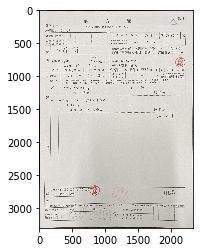

In [43]:
plt.imshow(dic["238"])

# 関数置き場

In [79]:
#------------------------------
#輪郭を検出する。
def waku_detection(img):
    ''' 
    input:画像のarray
    output:元の画像のarray,補正前の4隅の座標,補正前の横の長さ
    '''
    #画像をグレースケール化
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #閾値を180にして2値化
    threshold = 105
    ret, img_thresh = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)

    #輪郭を取り出している
    img_1, contours, hierarchy = cv2.findContours(img_thresh , cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #mensekiリストに輪郭を追加していっている。
    menseki=[ ]

    for i in range(0, len(contours)):
        menseki.append([contours[i],cv2.contourArea(contours[i])])

    menseki.sort(key=lambda x: x[1], reverse=True)

    #一番面積が大きいものを取り出している。
    cnt = menseki[0][0]
    plt.imshow(cv2.drawContours(img, cnt, -1, (255, 0, 0, 255), 2, cv2.LINE_AA))
    #輪郭のギザギザを無くしている
    epsilon = 0.1*cv2.arcLength(cnt,True)
    #approxに隅の四点の座標が入っている
    approx = cv2.approxPolyDP(cnt,epsilon,True)

    #ギザギザをなくした後の描画
    img3=cv2.drawContours(img, approx, 0,(0, 0, 255),10)

    #輪郭の表をリストにして、順番を整理
    approx=approx.tolist()

    left = sorted(approx,key=lambda x:x[0]) [:2]
    right = sorted(approx, key=lambda x: x[0])[2:]
    
    left_down= sorted(left,key=lambda x:x[0][1]) [0]
    left_up= sorted(left,key=lambda x:x[0][1]) [1]

    right_down= sorted(right,key=lambda x:x[0][1]) [0]
    right_up= sorted(right,key=lambda x:x[0][1]) [1]

    #補正前の角の座標
    perspective1 = np.float32([left_down, right_down, right_up, left_up])
    #補正後の横の長さ
    width = right_down[0][0] - left_down[0][0]
    return img,perspective1,width

IndexError: list index out of range

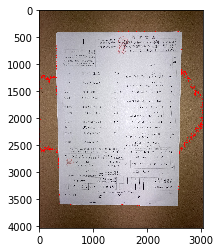

In [82]:
waku_detection(path_to_array(url_list[35]))

In [41]:
#------------------------------
def yugami(image_array):
    '''歪み補正
    input:画像のPath
    output:歪み補正した画像のarray
    '''
    #枠検出した結果をwaku_detection_resultに格納
    waku_detection_result=waku_detection(image_array)
    img = waku_detection_result[0]
    perspective1 = waku_detection_result[1]
    width = waku_detection_result[2]
    #補正後の縦の長さ
    height=width*2340//1654
    
    perspective2 = np.float32([[0, 0],[width, 0],[width, height],[0, height]])

    #変換に必要な行列
    psp_matrix = cv2.getPerspectiveTransform(perspective1,perspective2)
    #変換後
    #img_psp = cv2.warpPerspective(img, psp_matrix, (1654, 2340))
    img_psp = cv2.warpPerspective(img, psp_matrix, (width, height))
    return img_psp

In [2]:
def path_to_array(img_path):
    '''
    画像pathを画像arrayに変換する
    input:画像path
    output:array
    '''
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
